### Importing Libraries

In [884]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Loading Dataset

In [887]:
df = pd.read_csv('startup_funding 2.csv', encoding='utf-8')

In [889]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


### Understanding Structure Of Dataset

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### Checking for Null Values

In [895]:
df.isnull().sum()[df.isnull().sum()>0]

Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

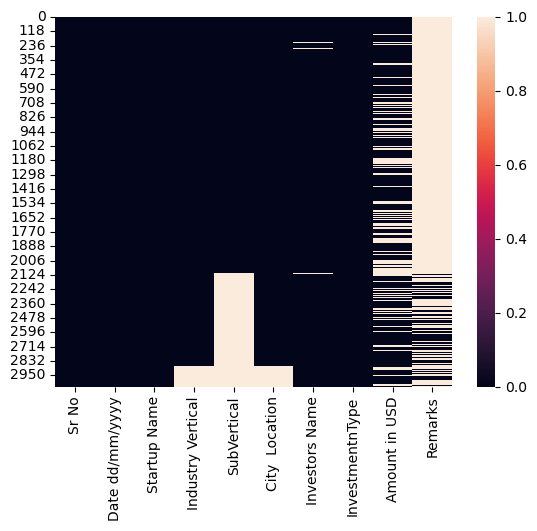

In [897]:
sns.heatmap(df.isnull())
plt.show()

### Setting Sr No as Index Column

In [900]:
df['Sr No'].nunique()

3044

In [902]:
if df['Sr No'].nunique() == len(df):
    df.set_index('Sr No', inplace=True)
    print('Set Sr No as Index')
else:
    print('Contains Duplicate')

Set Sr No as Index


### Dropping Unwanted Columns

In [905]:
df = df.drop(columns = 'Remarks')

In [907]:
df.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

### Renaming the Columns

In [910]:
df.rename(columns = {'Sr No':'Index',
                     'Date dd/mm/yyyy':'Date',
                     'Startup Name':'Startup',
                     'Industry Vertical':'Vertical',
                     'City  Location':'City',
                     'Investors Name':'Investor',
                     'InvestmentnType':'Investment Round',
                     'Amount in USD':'Amount in INR'
                    },inplace=True)

In [912]:
df.isnull().sum()[df.isnull().sum()>0]

Vertical            171
SubVertical         936
City                180
Investor             24
Investment Round      4
Amount in INR       960
dtype: int64

### Cleaning and Standardizing the Amount Column

In [915]:
df['Amount in INR'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [917]:
df['Amount in INR'] = df['Amount in INR'].fillna('0')

df['Amount in INR'] = df['Amount in INR'].str.replace(',', '', regex=False)
df['Amount in INR'] = df['Amount in INR'].str.replace(r'^\\\\xc2\\\\xa0', '', regex=True)



df['Amount in INR'] = df['Amount in INR'].replace(
    r'[^\d.]|undisclosed|unknown|Undisclosed|\\xc2\\xa0N/A|nan|N/A', '0', regex=True
)
 

df['Amount in INR'] = df['Amount in INR'].str.rstrip('+')

df['Amount in INR'] = df['Amount in INR'].astype(float)


In [919]:
df['Amount in INR'] = ((df['Amount in INR']*86.41)/10000000).round(2)

In [921]:
df['Amount in INR'].sample(10)

Sr No
1909      0.19
454      51.85
1699      1.30
1982     25.92
1477      0.00
1475      7.78
12      103.69
1695      0.00
2807      2.07
2368      0.00
Name: Amount in INR, dtype: float64

### Cleaning Date Column

In [923]:
invalid_dates = df[~pd.to_datetime(df['Date'],dayfirst = True, errors ='coerce').notnull()]
invalid_dates['Date']


Sr No
193               05/072018
2572              01/07/015
2607    \\xc2\\xa010/7/2015
2776             12/05.2015
2777             12/05.2015
2832             13/04.2015
3012             15/01.2015
3030            22/01//2015
Name: Date, dtype: object

In [925]:
df['Date'] = df['Date'].replace({
    '05/072018':'05/07/2018',
    '01/07/015':'01/07/2015',
    r'\\xc2\\xa010/7/2015':'10/07/2015',
    '22/01//2015':'22/01/2015',
    '12/05.2015':'12/05/2015',
    '13/04.2015':'13/04/2015',
    '15/01.2015':'15/01/2015'
})



In [927]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

### Filling the Null Values

In [930]:
df['Vertical'] = df['Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Unknown')
df['Investor'] = df['Investor'].fillna('Undisclosed')
df['Investment Round'] = df['Investment Round'].fillna('Undisclosed')


### Cleaning & Standardization City Column

In [933]:
df['City'] = df['City'].str.replace(r'^\\\\xc2\\\\xa0','',regex=True)

df['City'] = df['City'].replace('nan','Undisclosed')

df['City'] = df['City'].fillna('Undisclosed')

In [935]:
df['City'] = df['City'].replace(
    [
        'Bengaluru', "Bengaluru'", 'Mumbai/Bengaluru', 'Karnataka', 
        'New York/ India', 'Bangalore / USA', 'Boston', 'Bangalore / Palo Alto', 'US'
    ], 
    'Bangalore'
)


df['City'] = df['City'].replace(
    ['Andheri', 'Chembur', 'India', 'Uttar Pradesh', 'US/India', 'Mumbai / NY'], 
    'Mumbai'
)


df['City'] = df['City'].replace(
    ['Pune / Singapore', 'Pune/Seattle'], 
    'Pune'
)


df['City'] = df['City'].replace(
    ['Noida / Singapore', 'USA', 'Bangalore/ Bangkok', 'Seattle / Bangalore', 'New Delhi/ Houston'], 
    'Undisclosed'
)


df['City'] = df['City'].replace(
    ['India / US', 'Gurgaon / SFO', 'Bengaluru and Gurugram', 'Gurugram'], 
    'Gurgaon'
)

df['City'] = df['City'].replace(
    ['Ahemadabad', 'Ahemdabad'],
    'Ahmedabad'
)

df['City'] = df['City'].replace({
    'Kormangala': 'Koramangala',
    'Palo Alto': 'Chennai',
    'Bhubneswar': 'Bhubaneswar',
    'Kolkatta': 'Kolkata',
    'Nw Delhi': 'Delhi',
    'Hubli': 'Hubballi',
    'Kerala': 'Thiruvananthapuram',
    'Goa/Hyderabad': 'Verna',
    'Belgaum': 'Belagavi',
    'Mumbai / Global': 'Trivandrum',
    'Hyderabad/USA': 'Hyderabad',
    'New Delhi': 'Delhi'
})



df.loc[2070, 'City'] = 'Pune'
df.loc[2256, 'City'] = 'Pune'
df.loc[63, 'City'] = 'Delhi'
df.loc[69, 'City'] = 'Noida'
df.loc[2293, 'City'] = 'Mumbai'

df['City'] = df['City'].replace([
    'San Jose', 'Menlo Park', 'Burnsville', 'Santa Monica', 'Nairobi', 'Singapore', 'New York',
    'India/USA', "'New York'", 'California', 'Delhi & Cambridge', 'Missourie', 'Mumbai / UK',
    'SFO / Bangalore', 'London', 'Pune / Dubai', 'Bangalore / SFO', 'USA/India', 'Pune / US',
    'Chennai/ Singapore', 'Bangalore / San Mateo', 'Dallas / Hyderabad', 'Singapore', 'Mumbai / NY',
    'New Delhi / US', 'New Delhi / California', 'San Francisco', 'India/Singapore', 'India/US', 'San Jose,',"'New York, Bengaluru'"
], 'Out of India')




In [937]:
df['City'].unique()

array(['Bangalore', 'Gurgaon', 'Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'Out of India', 'Amritsar', 'Koramangala',
       'Tulangan', 'Hyderabad', 'Taramani', 'Haryana', 'Bhopal', 'Jaipur',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Ahmedabad', 'Rourkela',
       'Srinagar', 'Bhubaneswar', 'Chandigarh', 'Kolkata', 'Coimbatore',
       'Udaipur', 'Undisclosed', 'Surat', 'Goa', 'Gaya', 'Vadodara',
       'Trivandrum', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Hubballi', 'Thiruvananthapuram', 'Kozhikode', 'Siliguri',
       'Lucknow', 'Kanpur', 'Varanasi', 'Jodhpur', 'Verna', 'Belagavi'],
      dtype=object)

In [939]:
df[df['City'].str.contains('New')]

,Date,Startup,Vertical,SubVertical,City,Investor,Investment Round,Amount in INR
Sr No,,,,,,,,
132,2018-11-12,Blackbuck,Food Tech,POS For Online Ordering,"New York, Bengaluru",Tiger Global,Series A,8.64


In [941]:
df.loc[132, 'City'] = 'Out of India'

In [943]:
df['City'].unique()

array(['Bangalore', 'Gurgaon', 'Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'Out of India', 'Amritsar', 'Koramangala',
       'Tulangan', 'Hyderabad', 'Taramani', 'Haryana', 'Bhopal', 'Jaipur',
       'Nagpur', 'Indore', 'Ahmedabad', 'Rourkela', 'Srinagar',
       'Bhubaneswar', 'Chandigarh', 'Kolkata', 'Coimbatore', 'Udaipur',
       'Undisclosed', 'Surat', 'Goa', 'Gaya', 'Vadodara', 'Trivandrum',
       'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Agra', 'Hubballi',
       'Thiruvananthapuram', 'Kozhikode', 'Siliguri', 'Lucknow', 'Kanpur',
       'Varanasi', 'Jodhpur', 'Verna', 'Belagavi'], dtype=object)

### Cleaning the Investmnt Round Column 

In [946]:
df['Investment Round'] = df['Investment Round'].replace(
    ['Private\\\\nEquity', 'Private Equity Round', 'PrivateEquity', 'Private', 'Private Funding', 'Private\\nEquity'],
    'Private Equity'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Debt-Funding', 'Debt'],
    'Debt Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Venture', 'Venture - Series Unknown'],
    'Venture Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Seed Funding Round', 'Seed funding', 'Seed\\\\nFunding','Seed Round','Seed'],
    'Seed Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['pre-series A', 'pre-Series A', 'Pre Series A','Pre-series A'],
    'Pre-Series A'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Angel Funding', 'Angel'],
    'Angel Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Seed/ Angel Funding', 'Seed / Angle Funding', 'Angel / Seed Funding','Seed / Angel Funding'],
    'Seed/Angel Funding'
)

df['Investment Round'] = df['Investment Round'].replace(
    ['Equity', 'Equity Based Funding'],
    'Equity Round'
)

df['Investment Round'] = df['Investment Round'].replace(
    'Term Loa',
    'Term Loan'
)

df['Investment Round'] = df['Investment Round'].replace(
    'Crowd funding',
    'Crowd Funding'
)


In [948]:
df['Investment Round'].unique()

array(['Private Equity', 'Series C', 'Series B', 'Pre-Series A',
       'Seed Funding', 'Series A', 'Series D', 'Series F', 'Series E',
       'Debt Funding', 'Series G', 'Series H', 'Venture Round',
       'Undisclosed', 'Funding Round', 'Corporate Round', 'Maiden Round',
       'Single Venture', 'Angel Round', 'Series J', 'Bridge Round',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/Angel Funding', 'Equity Round', 'Mezzanine',
       'Series B (Extension)', 'Structured Debt', 'Term Loan',
       'Crowd Funding'], dtype=object)

In [950]:
df['Investment Round'].value_counts().sort_index()

Investment Round
Angel Round                       3
Bridge Round                      1
Corporate Round                   2
Crowd Funding                     2
Debt Funding                     27
Debt and Preference capital       1
Equity Round                      3
Funding Round                     1
Inhouse Funding                   1
Maiden Round                      1
Mezzanine                         1
Pre-Series A                      9
Private Equity                 1364
Seed Funding                   1398
Seed/Angel Funding              141
Series A                         24
Series B                         20
Series B (Extension)              1
Series C                         14
Series D                         12
Series E                          2
Series F                          2
Series G                          1
Series H                          1
Series J                          1
Single Venture                    1
Structured Debt                   1
Term Loan  

### Finding unwanted strings in Investor, Vertical and SubVertical Column

In [953]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
Investor_mistyped_names = df[df['Investor'].str.contains(pattern,regex = True, na = False)]
Investor_mistyped_names['Investor'].to_list()


['India Quotient and LetsVenture\\\\xe2\\\\x80\\\\x99s Angel Fund',
 'Sequoia India, Hillhouse Capital, Alphabet\\\\xe2\\\\x80\\\\x99s growth investment arm Capital G and Axis Bank',
 'Norwest Venture Partners, CDC Group, the UK\\\\xe2\\\\x80\\\\x99s Development Finance Institution and P Surendra Pai',
 'Lakestar and Jungle Ventures, Softbank\\\\xe2\\\\x80\\\\x99s DeepCore.',
 'DST Global and Lightspeed Venture Partners\\\\xe2\\\\x80\\\\x99 global fund.',
 'KDDI\\\\xc2\\\\xa0',
 'CLP Holdings Group, Innogy, \\\\xc3\\\\x98rstead, and Tenaska',
 'Vertex Ventures Southeast Asia (SEA) and India and Sistema Asia Fund, Fosun RZ Capital, Ventureast, and Endiya Partners.\\\\n\\\\n',
 'CDC Group plc\\\\xc2\\\\xa0',
 'Sunil Kant Munjal, Hero Electronix\\\\xe2\\\\x80\\\\x99s corporate financing arm, Electronic Development Fund',
 '"Kedaraa Capital, Ontario Teachers\\\\\'"',
 'Titan Co Ltd, Tata Group\\\\xe2\\\\x80\\\\x99s watch and jewellery retailing firm',
 'Factor[e] Ventures',
 'Undisclosed H

In [955]:
vertical_mistyped_names = r'[^a-zA-Z0-9\s.,&()-]'
vertical_mistyped_names = df[df['Vertical'].str.contains(vertical_mistyped_names,regex = True,na = False)]
print(vertical_mistyped_names['Vertical'])

Sr No
2176        Hyperlocal\\xc2\\xa0 Grocery Delivery Service
2201    WiFi \xe2\x80\x93 first Cloud communication pl...
2221                     Mobile Growth Hacking\\nPlatform
2239       Women Ethnic Wear\\xc2\\xa0 Online Marketplace
2365    Location based Nightlife recommendation\\xc2\\...
2386             Luxury goods\\xc2\\xa0 Shopping Platform
2395    ECommerce Brands\\xe2\\x80\\x99 Full Service A...
2397                 Community Driven News/Views Platform
2410                Home Design & D\\xc3\\xa9cor platform
2420           Chain of Tea Caf\\xc3\\xa9\\xe2\\x80\\x99s
2489              App security\\xc2\\xa0 testing platform
2509               Home Design & D\\xc3\\xa9cor solutions
2571                             CRM / Analytics platform
2603                 \\xc2\\xa0News Aggregator mobile app
2604                     \\xc2\\xa0Online Jewellery Store
2605                \\xc2\\xa0Fashion Info Aggregator App
2606             \\xc2\\xa0Online Study Notes Marketplace
2607    

In [957]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['SubVertical'].str.contains(pattern,regex=True)]
unwanted_subvertical['SubVertical']

Sr No
19                        Men's Health and Wellness brand
154                  News and ebooks Mobile App\\xc2\\xa0
183     Applied Artificial Intelligence and IoT focuse...
186        \\xc2\\xa0Customer Sourcing Platform\\xc2\\xa0
188     Post-Purchase Customer Engagement Platform\\xc...
439          "Women\\'s Fashion Clothing Online Platform"
569                           Credit + payment mobile app
685     parenting blog and kids\\xe2\\x80\\x99 events ...
753     Mobile SAAS\\xc2\\xa0 ECommerce platform for SMEs
773       Gesture based\\xc2\\xa0 Smartwatch manufacturer
853     Hyperlocal Discovery\\xc2\\xa0 & Rewards platform
904            Social Commerce\\xc2\\xa0 Fashion platform
1047       Online/App Based Car cleaning service provider
1216     Cloud based\\xc2\\xa0 health monitoring platform
1245           proximity based\\xc2\\xa0 Rewards platform
1319        Hyperlocal\\xc2\\xa0 Communication Mobile app
1322                    Online Food Ordering platform/App
1347    

### Removing Unwanted substrings

In [960]:

def remove_unwanted_substrings(value):
    value = re.sub(r'[^a-zA-Z0-9\s.,&()-]|\\xc2|\\xa0|\\x[a-zA-Z0-9]{2,}', '', value)
    return value


def replace_patterns(value, replace_slash=False):
    if replace_slash:
        value = value.replace('/', 'and')
    return value


def normalize_value(value):
    value = re.sub(r'\s+', ' ', value).strip()
    value = value.title()
    return value


columns_to_clean = {
    'Investor': {'replace_slash': False},
    'Vertical': {'replace_slash': True},
    'SubVertical': {'replace_slash': True},
}


for column, params in columns_to_clean.items():
    
    df[column] = df[column].apply(remove_unwanted_substrings)

    df[column] = df[column].apply(lambda x: replace_patterns(x, replace_slash=params['replace_slash']))

    df[column] = df[column].apply(normalize_value)


In [962]:
df[['Investor','Vertical', 'SubVertical']].sample(10)

,Investor,Vertical,SubVertical
Sr No,,,
2022,Myntralivspace Founders,Consumer Internet,Automobile Service Booking App
2966,Ashok Goel (Promoter),Others,Unknown
2579,Tiger Global,Language Learning App,Unknown
129,"Shunwei Capital, Dst Partners And Rps Ventures",Ecommerce,Social Commerce
2594,"Sunrise Capital Gmbh, Big Data Investments B.V",Big Data & Analytics Platform,Unknown
719,Info Edge (India) Ltd,Consumer Internet,Beauty Services Marketplace
784,Undisclosed Investors,Technology,In-Video Discovery Platform
571,Ani Technologies Pvt. Ltd,Consumer Internet,App Based Cab Hailing Services
441,"Singapore Angel Network, Mumbai Angel",E-Commerce,Online Platform Selling Indian Tea Globally


### Cleaning Startup Column

In [966]:
df['Startup'] = df['Startup'].str.strip().str.lower()

In [968]:
pattern = r'[^a-zA-Z0-9\s.,&()-]'
unwanted_subvertical = df[df['Startup'].str.contains(pattern,regex=True)]
unwanted_subvertical['Startup']

Sr No
1                                             byju’s
4                       https://www.wealthbucket.in/
54                                         lo! foods
68                                        "byju\\'s"
240                     what\\xe2\\x80\\x99s up life
713                             byju\\xe2\\x80\\x99s
714                  creator\\xe2\\x80\\x99s gurukul
984                             byju\\xe2\\x80\\x99s
1154                            serv\\xe2\\x80\\x99d
1165                            byju\\xe2\\x80\\x99s
1348                                      cheersoye!
1357                            byju\\xe2\\x80\\x99s
1395                           \\xc2\\xa0cloudcherry
1399                         let\xe2\x80\x99s barter
1433                                  zeolr/respiron
1515           don\\xe2\\x80\\x99t scratch your head
1541                        transtutors / askiitians
1554                            deal4loans / wishfin
1881                            byju\\xe

In [970]:
df['Startup'].nunique()

2349

In [972]:
unwanted_substrings = [
    r'\\xe2\\x80\\x99',  
    r'\\xc2\\xa0',       
    r'\\',               
    r'\n',              
    r'"',                
    r"’",                
    r'#',                
]

replace_by_quotation = [
    r'\\xe2\\x80\\x99',  
    r'\xe2\x80\x99',     
]

df['Startup'] = df['Startup'].str.replace(
    r'nearbuy \(previously\\xc2\\xa0 groupon india\)', 'Nearbuy', regex=True)

df['Startup'] = df['Startup'].replace('https://www.wealthbucket.in/', 'WealthBucket', regex=False)

df['Startup'] = df['Startup'].str.replace(r'/', ' and ', regex=False)

for pattern in unwanted_substrings:
    df['Startup'] = df['Startup'].str.replace(pattern, ' ', regex=True)

for pattern in replace_by_quotation:
    df['Startup'] = df['Startup'].str.replace(pattern, "'", regex=True)

df['Startup'] = df['Startup'].str.replace(r"^\W+|\W+$", "", regex=True)

df['Startup'] = df['Startup'].str.replace(r'\s+', ' ', regex=True).str.strip()

df['Startup'] = df['Startup'].str.lower()




In [977]:
df['Startup'].sample(10)

Sr No
1918        zendrive
1020       connaizen
2009    b9 beverages
2798        razorpay
306            nykaa
1941     anandakanda
1848      kartrocket
Name: Startup, dtype: object

### Exporting the Cleaned Dataset 

In [985]:
cleaned_file_path = "/Users/shraddheysatpute/Documents/Data Analyst/Datasets/startup_analysis_cleaned_main.csv"
df.to_csv(cleaned_file_path, index=False)



'/Users/shraddheysatpute/Documents/Data Analyst/Datasets/startup_analysis_cleaned_main.csv'

### Remaining cleaning was done on MS Excel.